In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

market_df=pd.read_csv("market_fact.csv")
customer_df=pd.read_csv("cust_dimen.csv")
product_df=pd.read_csv("prod_dimen.csv")
shipping_df=pd.read_csv("shipping_dimen.csv")
order_df=pd.read_csv("orders_dimen.csv")

In [2]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [3]:
order_df.head()

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2
2,483,10-07-2011,HIGH,Ord_3
3,515,28-08-2010,NOT SPECIFIED,Ord_4
4,613,17-06-2011,HIGH,Ord_5


In [4]:
df=pd.merge(market_df, order_df, how='inner', on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [5]:
df.shape

(8399, 13)

In [6]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ord_id               8399 non-null   object        
 1   Prod_id              8399 non-null   object        
 2   Ship_id              8399 non-null   object        
 3   Cust_id              8399 non-null   object        
 4   Sales                8399 non-null   float64       
 5   Discount             8399 non-null   float64       
 6   Order_Quantity       8399 non-null   int64         
 7   Profit               8399 non-null   float64       
 8   Shipping_Cost        8399 non-null   float64       
 9   Product_Base_Margin  8336 non-null   float64       
 10  Order_ID             8399 non-null   int64         
 11  Order_Date           8399 non-null   datetime64[ns]
 12  Order_Priority       8399 non-null   object        
dtypes: datetime64[ns](1), float64(5),

C:\Users\Subrata\AppData\Local\Temp\ipykernel_3272\1623211508.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [7]:
time_df=df.groupby('Order_Date')['Sales'].sum()
print(time_df)
print(type(time_df))

Order_Date
2009-01-01     1052.8400
2009-01-02    11101.8700
2009-01-03    31997.8555
2009-01-04     1254.2500
2009-01-05    39734.4040
                 ...    
2012-12-26      351.4100
2012-12-27    21119.5015
2012-12-28     2721.1800
2012-12-29    18874.4200
2012-12-30     3168.0500
Name: Sales, Length: 1418, dtype: float64
<class 'pandas.core.series.Series'>


D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order_Date', ylabel='Sales'>

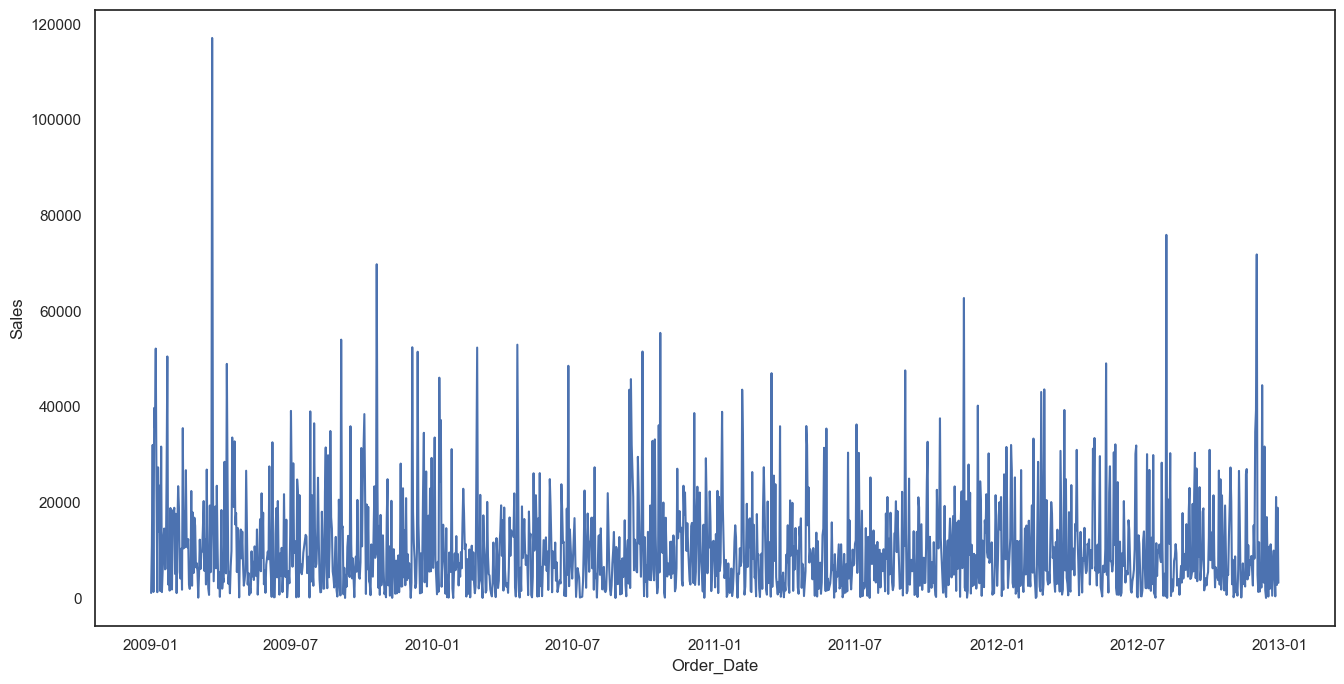

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(data=time_df)

In [9]:
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-11-09,MEDIUM


In [10]:
df.shape

(8399, 13)

In [11]:
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-11-09,MEDIUM,11,2010


In [12]:
df_time=df.groupby(["year", "month"]).Sales.mean()
df_time.head()

year  month
2009  1        2315.259908
      2        2187.372609
      3        2225.020157
      4        2286.491174
      5        1264.535923
Name: Sales, dtype: float64

In [32]:
df_time=pd.DataFrame({
    'time': pd.date_range(start='1/1/2020', periods=100, freq='W'),
    'sales': np.random.rand(100)
})

D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


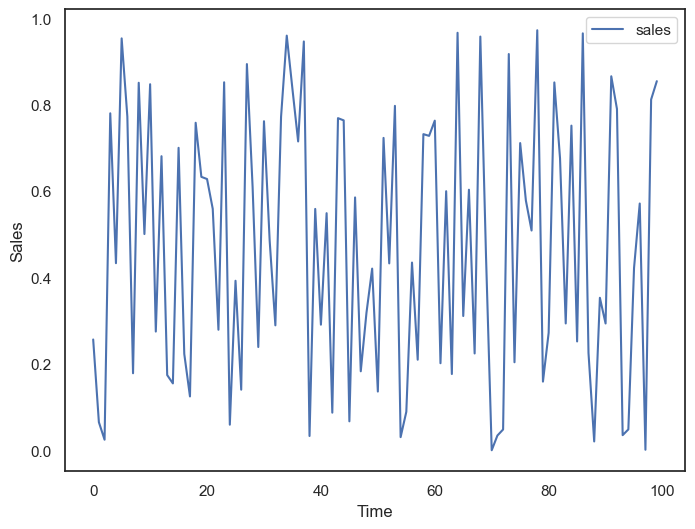

In [33]:
plt.figure(figsize=(8,6))
sns.lineplot(df_time)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

In [31]:
year_month=pd.pivot_table(df, values="Sales", index="year", columns="month", aggfunc='mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,2315.259908,2187.372609,2225.020157,2286.491174,1264.535923,1606.439439,2002.652474,1708.573653,1777.553631,2165.001596,1472.978852,2403.522257
2010,2027.269160,1525.733191,1369.861676,1791.735497,1424.795402,1734.205118,1352.267638,1148.823254,2167.581754,1863.530536,1651.536054,1786.863854
2011,1632.904078,1764.059653,1897.665840,1705.404716,1427.328783,1205.736863,1683.656061,1830.523197,1704.011086,1819.407446,2189.104143,1768.157605
2012,1968.939347,1816.661178,1767.554949,1472.664670,1805.577754,1819.611418,1445.295830,1672.624992,1615.591708,1765.058957,1939.546242,2273.777808


In [24]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<Axes: xlabel='month', ylabel='year'>

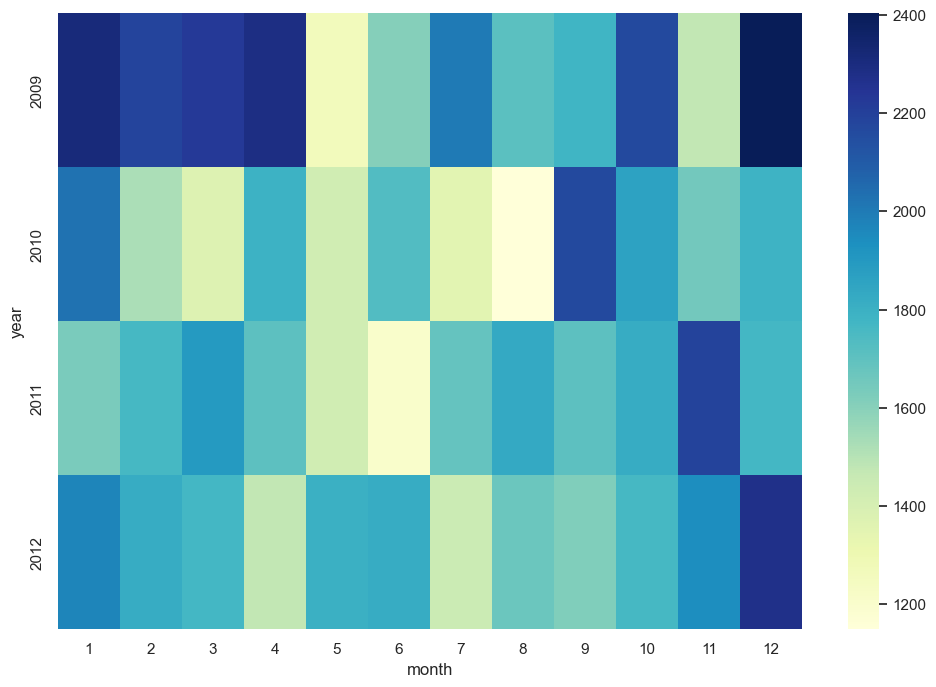

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(year_month, cmap="YlGnBu")